
### Problem Statement

<p>->Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination.</p>
<p>->Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season.</p>
<br>
<br>
<p>->A good harvest is ensured by several factors such as availability of water, soil fertility, timely use of pesticides and nature.</p>
<p>->While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.</p>
<p>->Pesticides are also special, because they protect the crop with the right dosage.</p>
<p>->But, if you add more than required, they may spoil the entire harvest.</p>
<p>->A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes.</p>
<br>
<br>
<p>->This data is based on crops harvested by various farmers at the end of harvest season.</p>
<p>->To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.</p>
<p>->You need to datermine whether the crop would be healthy(alive), damaged by pesticides or damaged by other reasons.</p>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import f_oneway
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('crop_health/train.csv')
test_df = pd.read_csv('crop_health/test.csv')

In [3]:
test_df.head()

ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0  F00000002                      188          1          1   
1  F00000007                      410          1          1   
2  F00000011                      626          1          0   
3  F00000013                      731          1          0   
4  F00000014                      789          0          0   

   Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                       1                  0                NaN   
1                       1                  0                0.0   
2                       1                  0                0.0   
3                       1                  0                0.0   
4                       1                  0                0.0   

   Number_Weeks_Quit  Season  
0                  0       2  
1                  0       2  
2                  0       2  
3                  0       2  
4                  0       1

In [4]:
train_df.head()

ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0  F00000001                      188          1          0   
1  F00000003                      209          1          0   
2  F00000004                      257          1          0   
3  F00000005                      257          1          1   
4  F00000006                      342          1          0   

   Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                       1                  0                0.0   
1                       1                  0                0.0   
2                       1                  0                0.0   
3                       1                  0                0.0   
4                       1                  0                0.0   

   Number_Weeks_Quit  Season  Crop_Damage  
0                  0       1            0  
1                  0       2            1  
2                  0       2            1  
3                  0       2            1  
4                  0       2            1

In [5]:
print(train_df.shape)
print(test_df.shape)

(88858, 10)
(59310, 9)


In [6]:
combined_df = pd.concat([train_df, test_df], axis =0)
print(combined_df.shape)

(148168, 10)


In [7]:
combined_df.head()

ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0  F00000001                      188          1          0   
1  F00000003                      209          1          0   
2  F00000004                      257          1          0   
3  F00000005                      257          1          1   
4  F00000006                      342          1          0   

   Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                       1                  0                0.0   
1                       1                  0                0.0   
2                       1                  0                0.0   
3                       1                  0                0.0   
4                       1                  0                0.0   

   Number_Weeks_Quit  Season  Crop_Damage  
0                  0       1          0.0  
1                  0       2          1.0  
2                  0       2          1.0  
3                  0       2          1.0  
4                  0       2          1.0

In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148168 entries, 0 to 59309
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       148168 non-null  object 
 1   Estimated_Insects_Count  148168 non-null  int64  
 2   Crop_Type                148168 non-null  int64  
 3   Soil_Type                148168 non-null  int64  
 4   Pesticide_Use_Category   148168 non-null  int64  
 5   Number_Doses_Week        148168 non-null  int64  
 6   Number_Weeks_Used        133275 non-null  float64
 7   Number_Weeks_Quit        148168 non-null  int64  
 8   Season                   148168 non-null  int64  
 9   Crop_Damage              88858 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 12.4+ MB


###  Missing Data Visualization

In [9]:
combined_df.isnull().sum()

ID                             0
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used          14893
Number_Weeks_Quit              0
Season                         0
Crop_Damage                59310
dtype: int64

<AxesSubplot:>

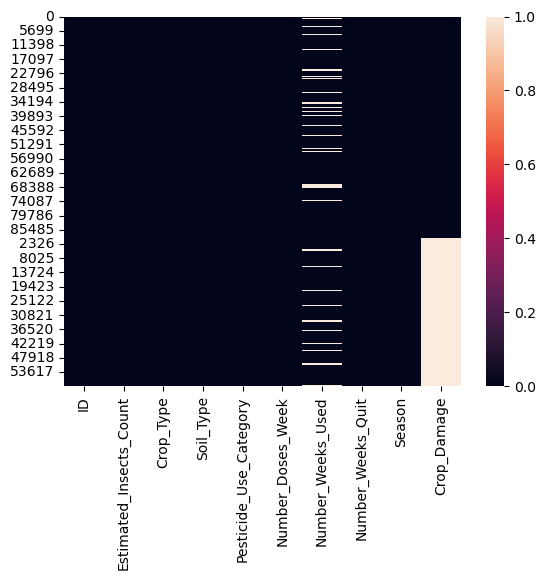

In [10]:
sns.heatmap(combined_df.isnull())

 From the given heatmap, we can see that there in missing values in 'Number_Weeks_Used' column

### Crop Type Distribution

In [11]:
combined_df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [12]:
def univariate_count (df,col, final_cols):
    df= df[col].value_counts().reset_index()
    df.columns = final_cols
    return df

In [13]:
# crop_type_df = univariate_count(combined_df, col = 'Crop_Type', final_cols=['Crop_Type', 'Frequency'])
# crop_type_df()

In [14]:
combined_df['Crop_Type'].value_counts()

0    105873
1     42295
Name: Crop_Type, dtype: int64

In [15]:
def create_piechart(df, val_col, label_col, colors, title, explode):
    
    plt.figure(figsize = (8,6))
    plt.pie(df[val_col], labels = df[label_col], explode = explode,
           colors = colors, autopct = "%.2f")
    plt.legend(loc = "upper right", bbox_to_anchor = (1.3, 1))
    plt.title(title)
    plt.show()

In [16]:
def univariate_barplot(df, val_col, label_col, colors, title,
                       xlabel_title, ylabel_title):
    
    plt.figure(figsize = (8, 6))
    ax = sns.barplot(x = label_col, y = val_col, data = df, 
                     palette = colors, label = df[label_col])
    plt.legend()
    for value in ax.patches:
        ax.text(value.get_x(), value.get_height() + 5, value.get_height())
    plt.title(title)
    plt.xlabel(xlabel_title)
    plt.ylabel(ylabel_title)
    plt.show()
    

In [17]:
def univariate_numeric_plot(df, col_name, color):
    
    plt.figure(figsize = (20, 8))
    plt.subplot(1,3,1)
    sns.histplot(df[col_name], kde = True,
                 color = color,
                 alpha = 0.2,
                line_kws = {'linestyle': 'dashed'})
    plt.subplot(1,3,2)
    sns.kdeplot(df[col_name])
    plt.subplot(1,3,3)
    sns.boxplot(y = df[col_name])
    if shapiro(combined_df[col_name])[1] > 0.05:
        print("The data follows a normal distribution")
    else:
        print("The data does not follow a normal distribution")
    plt.show()

In [18]:
def univariate_histplot(df, col_name, color):
    
    plt.figure(figsize = (15, 8))
    plt.subplot(1,2,1)
    sns.histplot(df[col_name], kde = True,
                 color = color,
                 alpha = 0.2,
                line_kws = {'linestyle': 'dashed'})
    plt.subplot(1,2,2)
    sns.kdeplot(df[col_name])
    plt.show()

In [19]:
def bivariate_count(df, target_col, cause_col):
    
    bivariate_df = pd.crosstab(df[target_col], df[cause_col]).reset_index()
    bivariate_df = bivariate_df.rename_axis(None, axis = 1)
    return bivariate_df

In [20]:
def bivariate_vertical_layout(df, target_col, legend_x, legend_y, bar_width, bar_height):
    
    layout = go.Layout(
#       xaxis_tickmode="array",
#       xaxis_tickvals=list(range(27)),
#       xaxis_ticktext=tuple(df[target_col].values),
      legend=dict(
          x=legend_x,  
          y=legend_y),
      showlegend=True,
      font=dict(size=14),
      width=bar_width,
      height=bar_height,
      margin=dict(l=0, r=0, b=0, t=30),
    )
    return layout

In [21]:
def bivariate_horizontal_layout(df, target_col, legend_x, legend_y, bar_width, bar_height):
    
    layout = go.Layout(
#       yaxis_tickmode="array",
#       yaxis_tickvals=list(range(27)),
#       yaxis_ticktext=tuple(df[target_col].values),
      legend=dict(
          x=legend_x,  
          y=legend_y),
      showlegend=True,
      font=dict(size=14),
      width=bar_width,
      height=bar_height,
      margin=dict(l=0, r=0, b=0, t=30),
    )
    return layout

In [22]:
def create_bivariate_bargraph(df, colors, legend_labels,
                              target_col, graph_orientation, bar_width, bar_height,
                              legend_x, legend_y, fig_title, 
                              x_axis_title, y_axis_title):
    
    barplots = []
    columns = [col for col in list(df.columns) if col not in target_col]
    target_values = df[target_col]
    target_indexes = list(range(len(df)))
    if graph_orientation == "v":
        for i in range(len(columns)):
            barplots.append(go.Bar(x = target_values[target_indexes], 
            y = df[columns[i]], orientation = graph_orientation,
            name=legend_labels[i],
            text = df[columns[i]], 
            marker=go.bar.Marker(color=colors[i])))
        layout = bivariate_vertical_layout(df, target_col, legend_x, legend_y, bar_width, bar_height)    
    else:
        for i in range(len(columns)):
            barplots.append(go.Bar(x = df[columns[i]], 
            y = target_values[target_indexes], orientation = graph_orientation,
            name=legend_labels[i],
            text = df[columns[i]], 
            marker=go.bar.Marker(color=colors[i])))
    layout = bivariate_horizontal_layout(df, target_col, legend_x, legend_y, bar_width, bar_height)
    
# Make the multi-bar plot
    fig = go.Figure(data=barplots, layout=layout)
    fig.update_layout(title_text = fig_title)
    fig.update_xaxes(title_text=x_axis_title)
    fig.update_yaxes(title_text=y_axis_title)
    fig.show()

In [23]:
def bivariate_kdeplot(df, col_name, target_col, colors):
    
    target_values = list(df[target_col].unique())
    legends = []
    for index in range(len(target_values)):
        if type(target_values[index]).__name__ == 'float':
            legends.append('test')
            effect_col = df.loc[df[target_col].isnull()]
            sns.kdeplot(effect_col[col_name],
             color = colors[index])
        else: 
            legends.append(target_values[index])
            effect_df = df.loc[df[target_col] == target_values[index]]
            sns.kdeplot(effect_df[col_name],
                         color = colors[index])
    plt.legend(legends)

In [24]:
def bivariate_histplot(df, col_name, target_col, colors):
    
    plt.figure(figsize = (15, 8))
    plt.subplot(1,2,1)
    target_values = list(df[target_col].unique())
    legends = []
    for index in range(len(target_values)):
        if type(target_values[index]).__name__ == 'float':
            legends.append('test')
            effect_col = df.loc[df[target_col].isnull()]
            sns.histplot(effect_col[col_name], kde = True,
             color = colors[index],
             alpha = 0.2,
            line_kws = {'linestyle': 'dashed'})
        else: 
            legends.append(target_values[index])
            effect_df = df.loc[df[target_col] == target_values[index]]
            sns.histplot(effect_df[col_name], kde = True,
                         color = colors[index],
                         alpha = 0.2,
                        line_kws = {'linestyle': 'dashed'})
    plt.legend(legends)
    plt.show()

In [25]:
def bivariate_hist_kdeplot(df, col_name, target_col, colors):
    
    plt.figure(figsize = (16, 8))
    plt.subplot(1, 2, 1)
    bivariate_histplot(df, col_name, target_col, colors)
    plt.subplot(1,2, 2)
    bivariate_kdeplot(eda_df, col_name, target_col, colors)
    plt.show()
    

In [26]:
def chisquare_test(df, cause_col, effect_col):
    
    cause_effect_df = pd.crosstab(df[effect_col], df[cause_col])
    alpha = 0.05
    H0 = "H0: There is no relationship between {} and {}".format(cause_col, effect_col)
    H1 = "H1: There is a relationship between {} and {}".format(cause_col, effect_col)
    test_stats = stats.chi2_contingency(observed = cause_effect_df)
    p_value = test_stats[1]
    print("P value is {}".format(p_value))
    if p_value <= alpha:
        print(H1)
    else:
        print(H0)

In [27]:
def fstatistic_test(df, cause_col, effect_col):
    
    alpha = 0.05
    category_group_list = df.groupby(effect_col)[cause_col].apply(list)
    H0 = "H0: There is no relationship or correlation between {} and {}".format(cause_col, effect_col)
    H1 = "H1: There is a relationship or correlation between {} and {}".format(cause_col, effect_col)
    anova_results = f_oneway(*category_group_list)
    p_value = anova_results[1]
    print("P value is {}".format(p_value))
    if p_value <= alpha:
        print(H1)
    else:
        print(H0)

### Creating a copy of our dataset for doing EDA

In [28]:
eda_df = combined_df.copy()
eda_df.replace({"Crop_Damage" : {0: "Alive",
                                 1: "Damage Due To Other Causes",
                                 2: "Damage Due To Pesticides"},
                
               "Crop_Type" : {0: "Crop_Type_0",
                              1: "Crop_Type_1"},
                
                "Soil_Type" : {0: "Soil Type 0",
                               1: "Soil Type 1"},
                
                "Pesticide_Use_Category" : {1: "Never Used",
                                            2: "Previously Used",
                                            3: "Currently Using"},
                
                "Season" : {1: "Season_One",
                            2: "Season_Two",
                            3: "Season_Three"}
               }, inplace = True)

In [29]:
eda_df.head()

ID  Estimated_Insects_Count    Crop_Type    Soil_Type  \
0  F00000001                      188  Crop_Type_1  Soil Type 0   
1  F00000003                      209  Crop_Type_1  Soil Type 0   
2  F00000004                      257  Crop_Type_1  Soil Type 0   
3  F00000005                      257  Crop_Type_1  Soil Type 1   
4  F00000006                      342  Crop_Type_1  Soil Type 0   

  Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0             Never Used                  0                0.0   
1             Never Used                  0                0.0   
2             Never Used                  0                0.0   
3             Never Used                  0                0.0   
4             Never Used                  0                0.0   

   Number_Weeks_Quit      Season                 Crop_Damage  
0                  0  Season_One                       Alive  
1                  0  Season_Two  Damage Due To Other Causes  
2                  0  Season_Two  Damage Due To Other Causes  
3                  0  Season_Two  Damage Due To Other Causes  
4                  0  Season_Two  Damage Due To Other Causes

### Visualizing Target Column

In [30]:
crop_health_df = univariate_count(eda_df, col = "Crop_Damage",
                               final_cols = ["Crop_Damage", "Frequency"])

crop_health_df.head()

Crop_Damage  Frequency
0                       Alive      74238
1  Damage Due To Other Causes      12307
2    Damage Due To Pesticides       2313

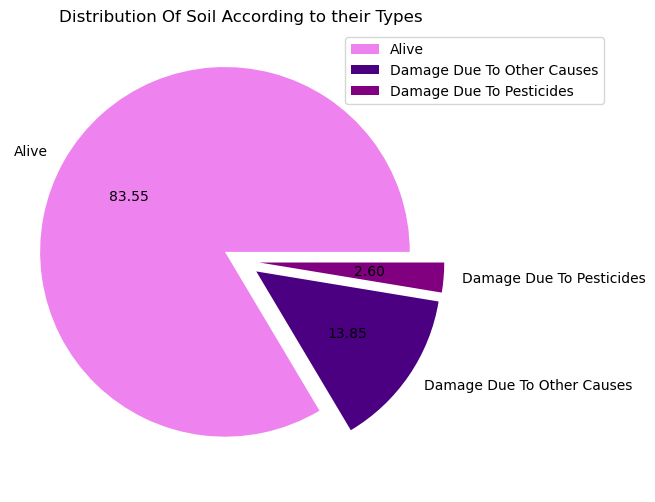

In [31]:
create_piechart(df = crop_health_df, val_col = "Frequency", 
                label_col = "Crop_Damage",
               colors = ['violet', 'indigo', 'purple'],
                explode = (0.1, 0.1, 0.1),
                title = "Distribution Of Soil According to their Types")

### Crop Type Distribution

In [32]:
crop_type_df = univariate_count(eda_df, col = "Crop_Type",
                               final_cols = ["Crop_Type", "Frequency"])


crop_type_df.head()

Crop_Type  Frequency
0  Crop_Type_0     105873
1  Crop_Type_1      42295

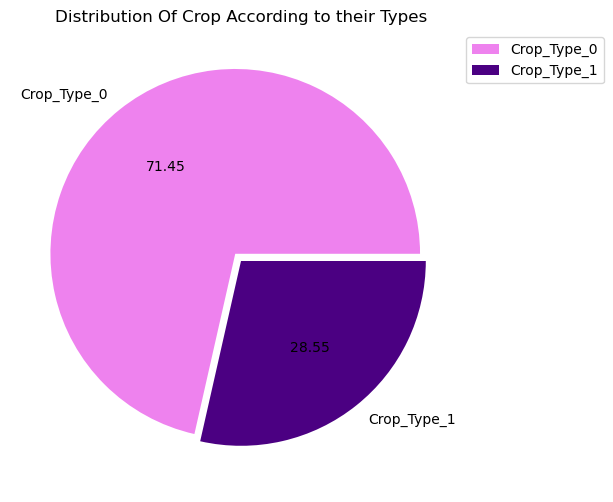

In [33]:
create_piechart(df = crop_type_df, val_col = "Frequency", 
                label_col = "Crop_Type",
                colors = ['violet', 'indigo'],
                explode = (0.05, 0),
                title = "Distribution Of Crop According to their Types")

#### is crop health determined by crop type?

In [34]:
crop_type_effect_df = bivariate_count(df = eda_df, 
                                      target_col = "Crop_Damage",
                                      cause_col = "Crop_Type")
crop_type_effect_df.head()

Crop_Damage  Crop_Type_0  Crop_Type_1
0                       Alive        52778        21460
1  Damage Due To Other Causes         9204         3103
2    Damage Due To Pesticides         1607          706

In [35]:
create_bivariate_bargraph(df = crop_type_effect_df, 
                          colors = ['red', 'blue'],
                          legend_labels = ['CropType1', 'CropType2'],
                          target_col = "Crop_Damage",
                          graph_orientation = "v",
                          bar_width = 800,
                          bar_height = 600,
                          legend_x = 0.8,
                          legend_y = 0.99,
                          fig_title = "Effect Of Crop Type On Crop Health", 
                          x_axis_title = "Crop Health",
                          y_axis_title = "Frequency")

In [36]:
print(52778/(52778+9204+1607))
print(9204/(52778+9204+1607))
print(1607/(52778+9204+1607))

0.8299863183884005
0.1447420151284027
0.02527166648319678


<p>82.99% of crop 1 is alive</p>
<p>13.47% of crop 1 is damaged due to other causes</p>
<p>2.52% of crop 1 is damaged due to pesticides</p>

In [37]:
import scipy.stats as stats
alpha = 0.05
Ho = "H0: There is no relationship between crop health and crop type"
H1= "H1: There is a relationship between crop health and crop type"
test_stats = stats.chi2_contingency(observed = crop_type_effect_df.set_index('Crop_Damage'))
p_value = test_stats[1]
print(p_value)
if p_value <= alpha:    
    print(H1)
else:
    print(H2)

3.3787790720194964e-17
H1: There is a relationship between crop health and crop type


In [38]:
# plt.figure(figsize = (8,6))
# plt.pie(combined_df['Crop_Type'], labels = [0,1], explode = (0, 0.25), colors=['violet', 'purple'], autopct = "%.2f")
# plt.legend('bbox_to_ancor')
# plt.show()

## Soil_type

In [39]:
soil_type_df = univariate_count(combined_df, col = 'Soil_Type', final_cols=['Soil_Type', 'Frequency'])
# soil_type_df['Soil_Type'] = soil_type_df['Soil_Type'].rename({0:'Infertile', 1:'Fertile'}, axis =1)
soil_type_df.head()

Soil_Type  Frequency
0          0      80441
1          1      67727

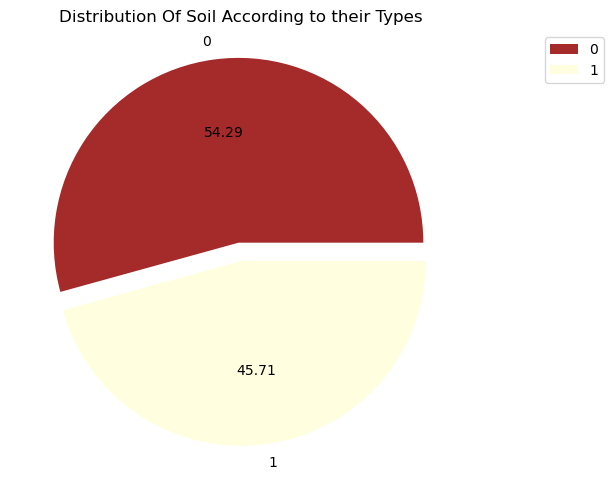

In [40]:
create_piechart(df = soil_type_df, val_col = "Frequency", 
                label_col = "Soil_Type",
               colors = ['brown', 'lightyellow'],
                explode = (0.1, 0),
                title = "Distribution Of Soil According to their Types")

In [41]:
soil_type_effect_df = bivariate_count(df = eda_df, 
                                      target_col = "Crop_Damage",
                                      cause_col = "Soil_Type")
soil_type_effect_df.head()

Crop_Damage  Soil Type 0  Soil Type 1
0                       Alive        39841        34397
1  Damage Due To Other Causes         6953         5354
2    Damage Due To Pesticides         1330          983

In [42]:
create_bivariate_bargraph(df = soil_type_effect_df, 
                          colors = ['red', 'blue'],
                          legend_labels = ['SoilType1', 'SoilType2'],
                          target_col = "Crop_Damage",
                          graph_orientation = "v",
                          bar_width = 800,
                          bar_height = 600,
                          legend_x = 0.8,
                          legend_y = 0.99,
                          fig_title = "Effect Of Soil Type On Crop Health", 
                          x_axis_title = "Crop Health",
                          y_axis_title = "Frequency")

In [43]:
print(39841/(39841+6953+1330))
print(6953/(39841+6953+1330))
print(1330/(39841+6953+1330))
#Soil type 1

0.8278821378106558
0.14448092427894604
0.02763693791039814


In [44]:
soil_crop_type = pd.crosstab(eda_df['Soil_Type'],eda_df['Crop_Type'])
soil_crop_type.head()

Crop_Type    Crop_Type_0  Crop_Type_1
Soil_Type                            
Soil Type 0        47834        32607
Soil Type 1        58039         9688

In [45]:
import scipy.stats as stats
alpha = 0.05
Ho = "H0: There is no relationship between soil type and crop type"
H1= "H1: There is a relationship between soil type and crop type"
test_stats = stats.chi2_contingency(observed = soil_crop_type)
p_value = test_stats[1]
print(p_value)
if p_value <= alpha:    
    print(H1)
else:
    print(H2)

0.0
H1: There is a relationship between soil type and crop type


### Pesticide_Use_Category Column

In [46]:
pesticide_use_df = univariate_count(eda_df, col = "Pesticide_Use_Category",
                               final_cols = ["Pesticide_Use_Category", "Frequency"])
pesticide_use_df.head()

Pesticide_Use_Category  Frequency
0        Previously Used     106265
1        Currently Using      40495
2             Never Used       1408

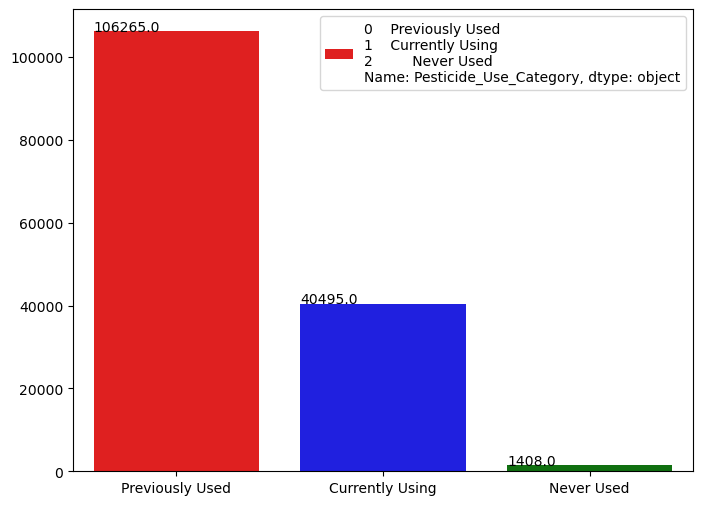

In [47]:
univariate_barplot(pesticide_use_df, val_col = "Frequency", 
                  label_col = "Pesticide_Use_Category", colors = ["red", "blue", "green"],
                  title = "", xlabel_title = "", ylabel_title = "")

In [48]:
pesticide_use_effect_df = bivariate_count(df = eda_df, 
                                      target_col = "Crop_Damage",
                                      cause_col = "Pesticide_Use_Category")
pesticide_use_effect_df.head()

Crop_Damage  Currently Using  Never Used  Previously Used
0                       Alive            17162         118            56958
1  Damage Due To Other Causes             5681         554             6072
2    Damage Due To Pesticides             1469         165              679

In [49]:
create_bivariate_bargraph(df = pesticide_use_effect_df, 
                          colors = ['red', 'blue', 'green'],
                          legend_labels = ['Currently Used', 'Never Used', 'Previously Used'],
                          target_col = "Crop_Damage",
                          graph_orientation = "v",
                          bar_width = 800,
                          bar_height = 600,
                          legend_x = 0.8,
                          legend_y = 0.99,
                          fig_title = "Effect Of Pesticide use On Crop Health", 
                          x_axis_title = "Crop Health",
                          y_axis_title = "Frequency")

In [50]:
#previously used
print(56958/(56958+6072+679))
print(6072/(56958+6072+679))
print(679/(56958+6072+679))

0.8940338099797517
0.09530835517744746
0.01065783484280086


#### Hypothesis Testing (Pesticide_Use_Category and Crop_Damage)

In [51]:
chisquare_test(df = eda_df, cause_col = "Pesticide_Use_Category", effect_col = "Crop_Damage")

P value is 0.0
H1: There is a relationship between Pesticide_Use_Category and Crop_Damage


### Season column

In [52]:
season_df = univariate_count(eda_df, col = "Season",
                               final_cols = ["Season", "Frequency"])
season_df.head()

Season  Frequency
0    Season_Two      73715
1    Season_One      44744
2  Season_Three      29709

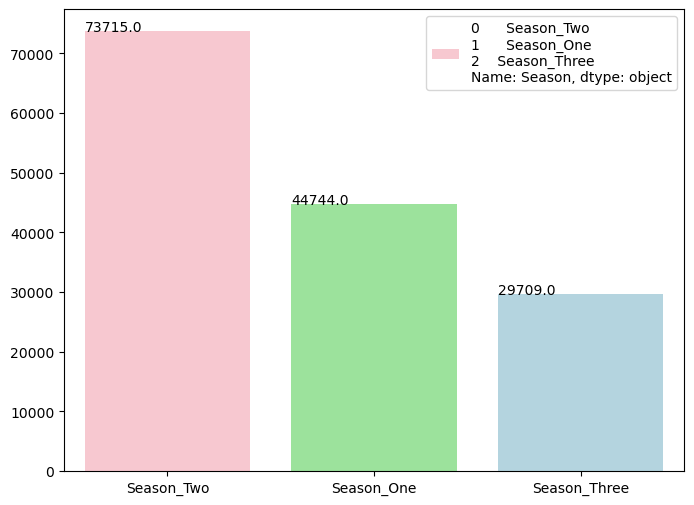

In [53]:
univariate_barplot(season_df, val_col = "Frequency", 
                  label_col = "Season", colors = ["pink", "lightgreen", "lightblue"],
                  title = "", xlabel_title = "", ylabel_title = "")

In [54]:
season_effect_df = bivariate_count(df = eda_df, 
                                      target_col = "Crop_Damage",
                                      cause_col = "Season")
season_effect_df.head()

Crop_Damage  Season_One  Season_Three  Season_Two
0                       Alive       22493         14864       36881
1  Damage Due To Other Causes        3748          2444        6115
2    Damage Due To Pesticides         661           438        1214

In [55]:
create_bivariate_bargraph(df = season_effect_df, 
                          colors = ['red', 'blue', 'green'],
                          legend_labels = ['Season One', 'Season Three', 'Season Two'],
                          target_col = "Crop_Damage",
                          graph_orientation = "v",
                          bar_width = 800,
                          bar_height = 600,
                          legend_x = 0.8,
                          legend_y = 0.99,
                          fig_title = "Effect Of Season On Crop Health", 
                          x_axis_title = "Crop Health",
                          y_axis_title = "Frequency")

## Estimated Insects Count

In [56]:
eda_df.describe()

Estimated_Insects_Count  Number_Doses_Week  Number_Weeks_Used  \
count            148168.000000      148168.000000      133275.000000   
mean               1398.212401          25.850724          28.656485   
std                 849.197419          15.525407          12.403662   
min                 150.000000           0.000000           0.000000   
25%                 731.000000          15.000000          20.000000   
50%                1212.000000          20.000000          28.000000   
75%                1898.000000          40.000000          37.000000   
max                4097.000000          95.000000          67.000000   

       Number_Weeks_Quit  
count      148168.000000  
mean            9.565324  
std             9.882540  
min             0.000000  
25%             0.000000  
50%             7.000000  
75%            16.000000  
max            50.000000

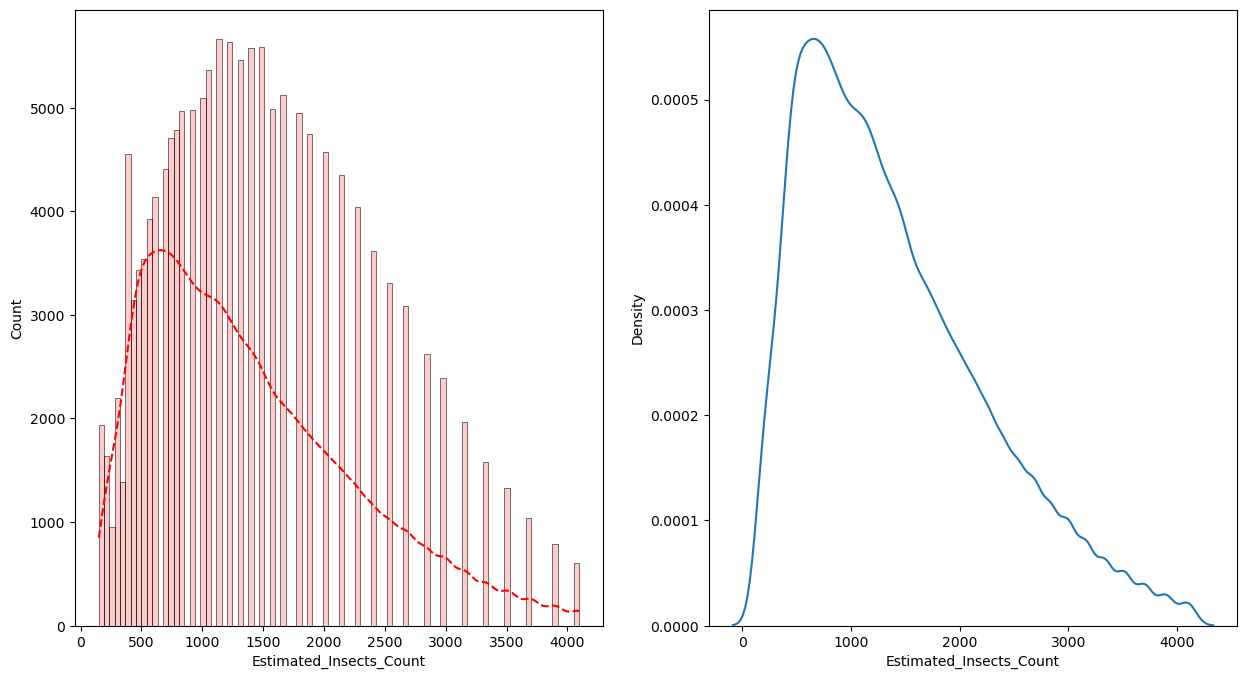

In [57]:
univariate_histplot(df = eda_df, col_name = "Estimated_Insects_Count", color = "red")

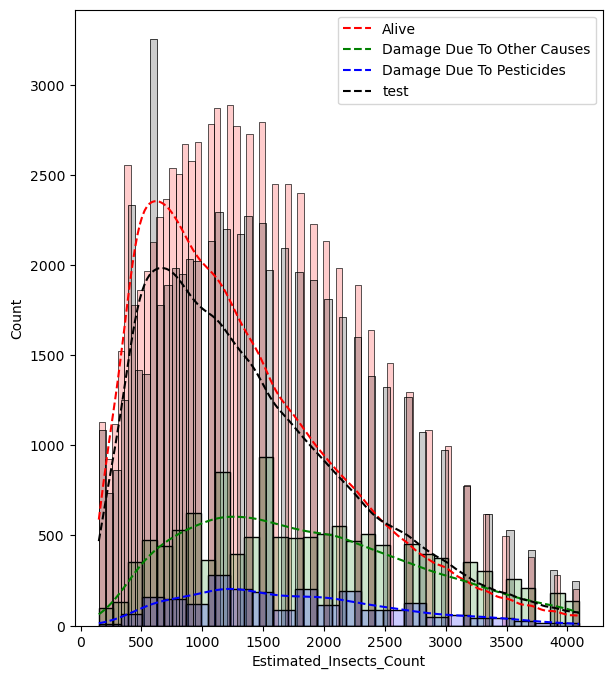

In [58]:

bivariate_histplot(eda_df, col_name = "Estimated_Insects_Count",
                  target_col = 'Crop_Damage', colors = ['red', 'green', 'blue', 'black'])

### Number_Doses_Week column

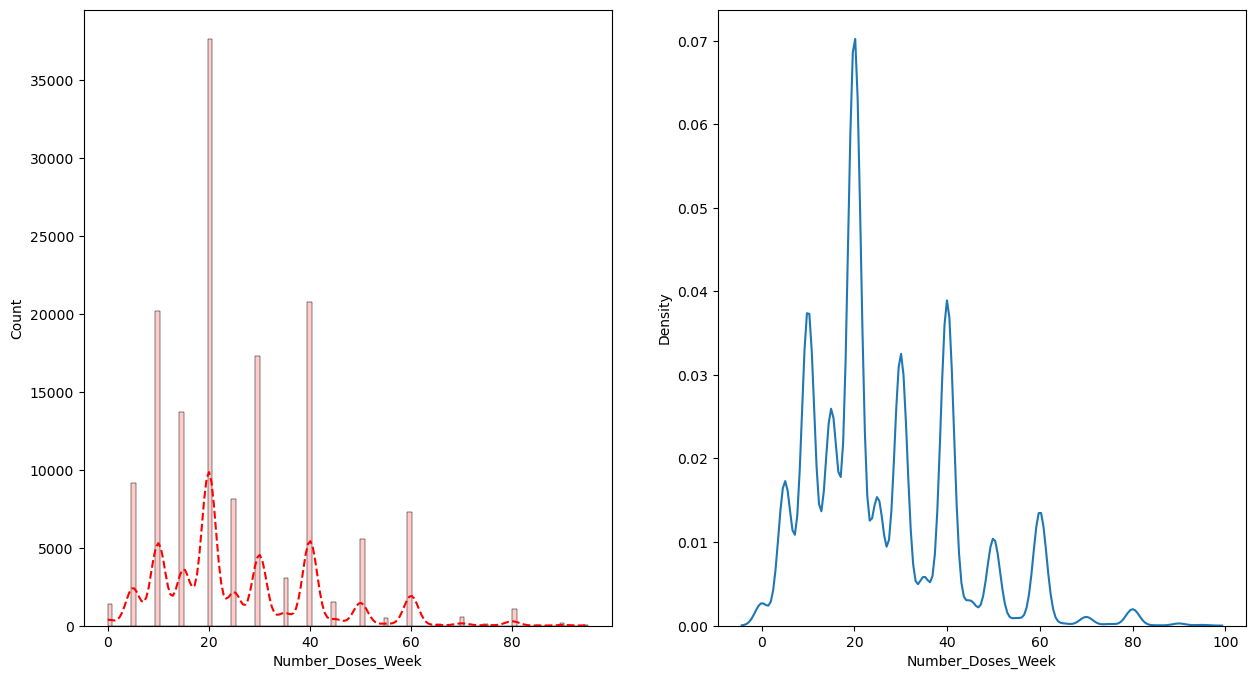

In [59]:
univariate_histplot(df = combined_df, col_name = "Number_Doses_Week", color = "red")

### Number_of_weeks_used

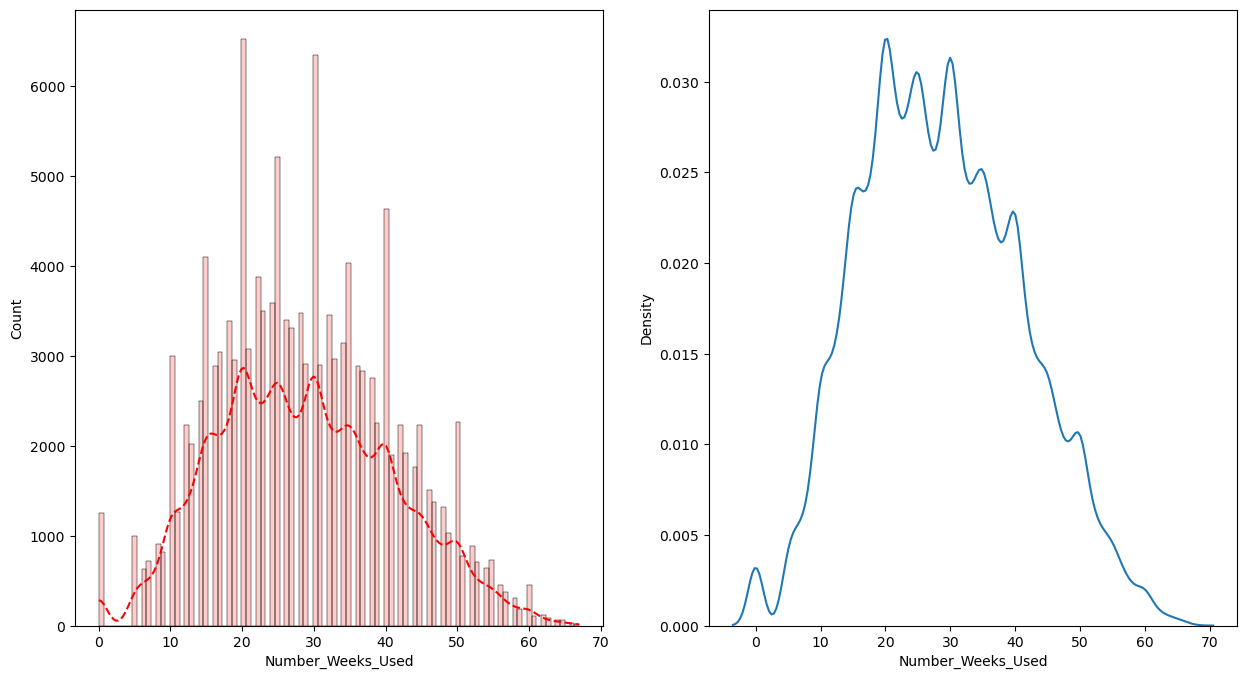

In [60]:
univariate_histplot(df = combined_df, col_name = "Number_Weeks_Used", color = "red")

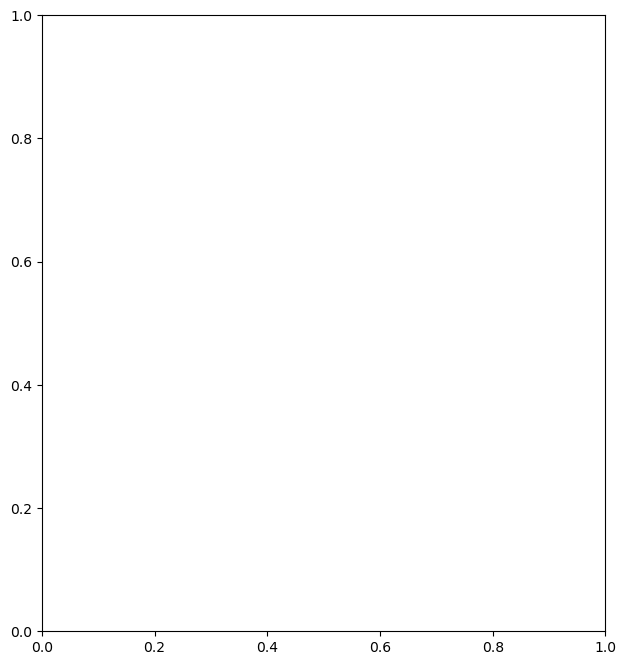

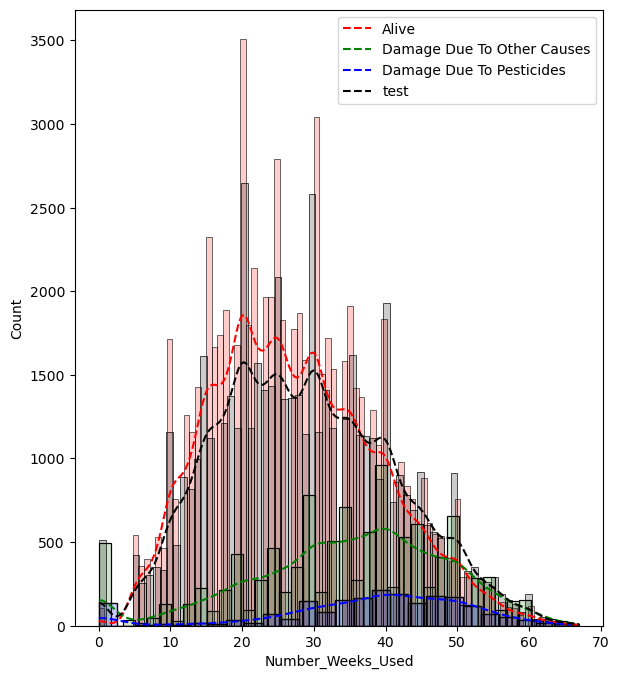

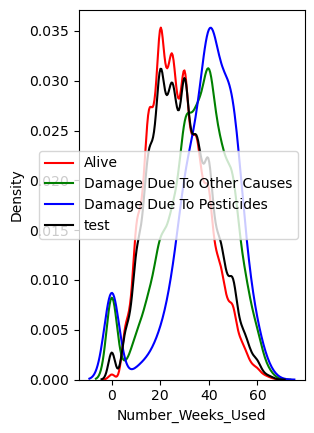

In [61]:
bivariate_hist_kdeplot(eda_df, col_name = "Number_Weeks_Used",
                  target_col = 'Crop_Damage', colors = ['red', 'green', 'blue', 'black'])

### Number_Weeks_Quit

The data does not follow a normal distribution


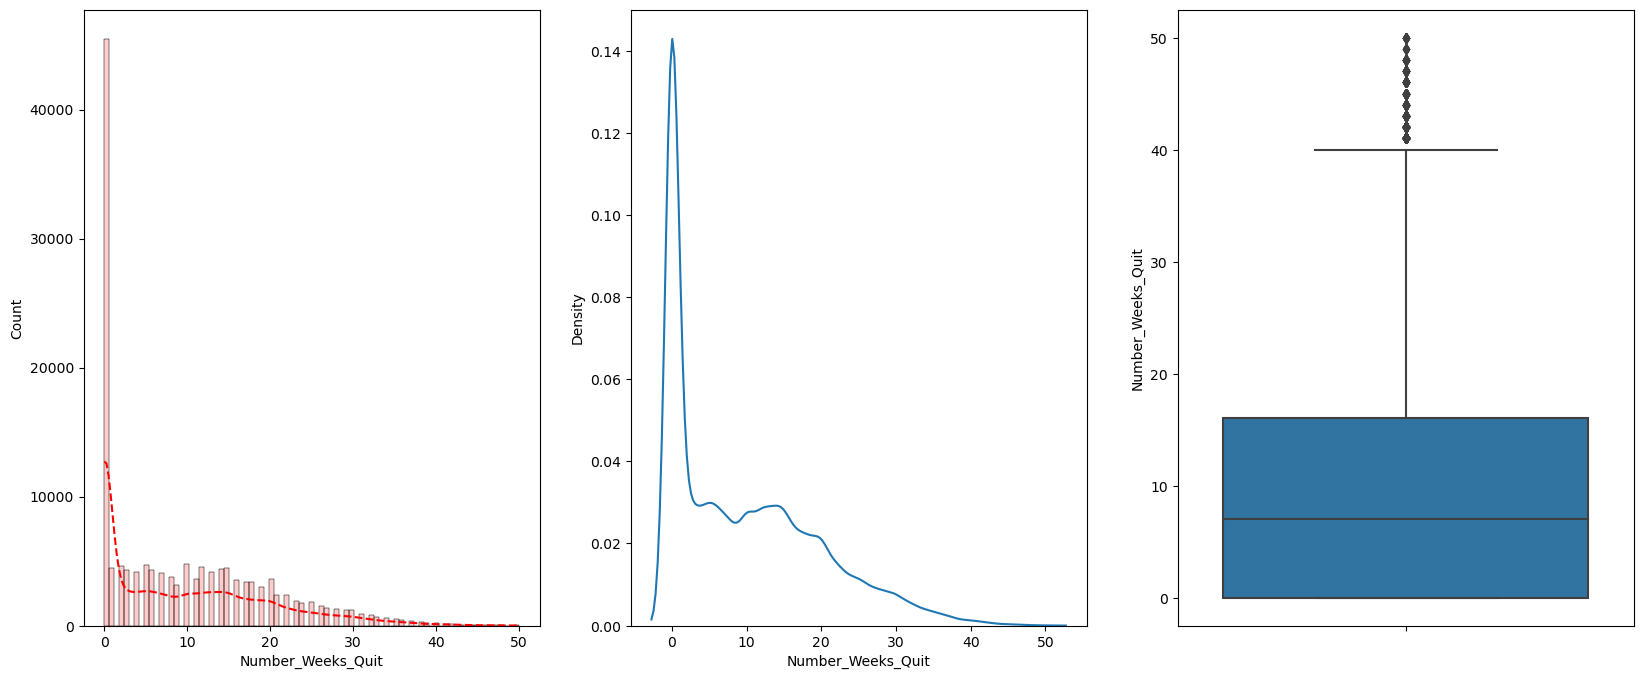

In [62]:
univariate_numeric_plot(df = eda_df, col_name = "Number_Weeks_Quit", color = "red")

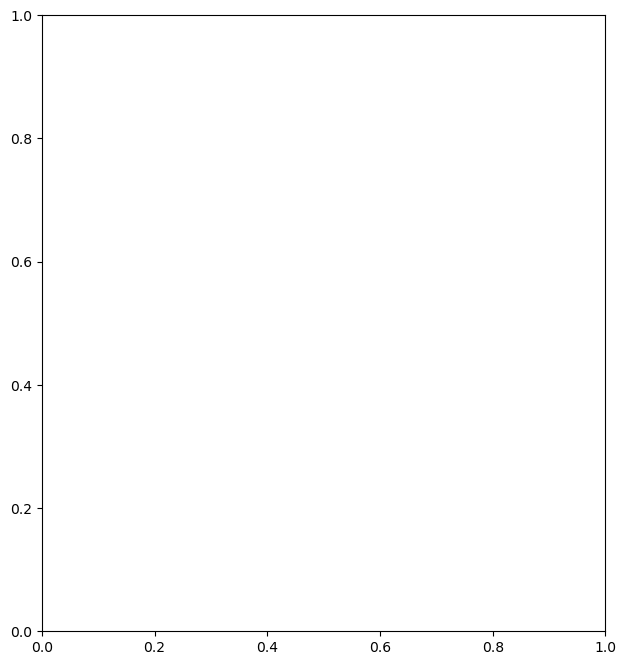

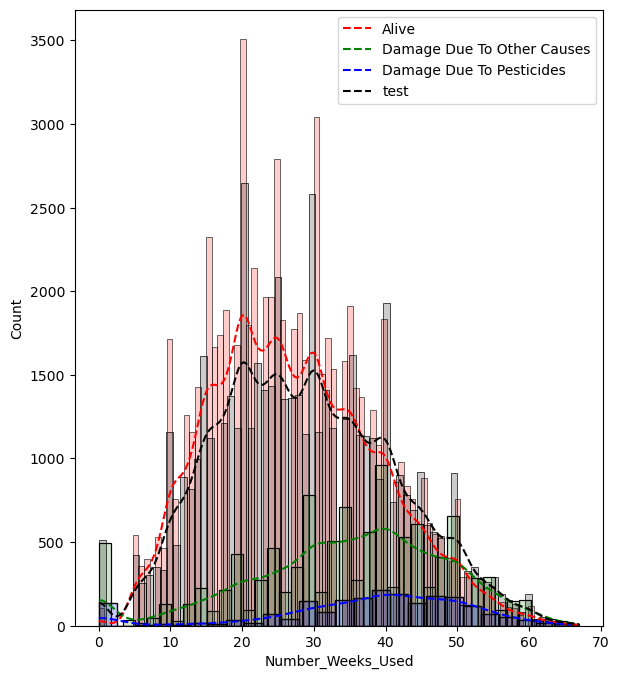

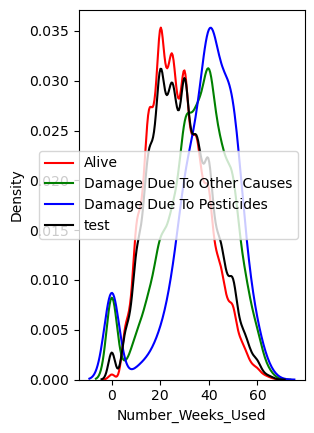

In [63]:
bivariate_hist_kdeplot(eda_df, col_name = "Number_Weeks_Used",
                  target_col = 'Crop_Damage', colors = ['red', 'green', 'blue', 'black'])

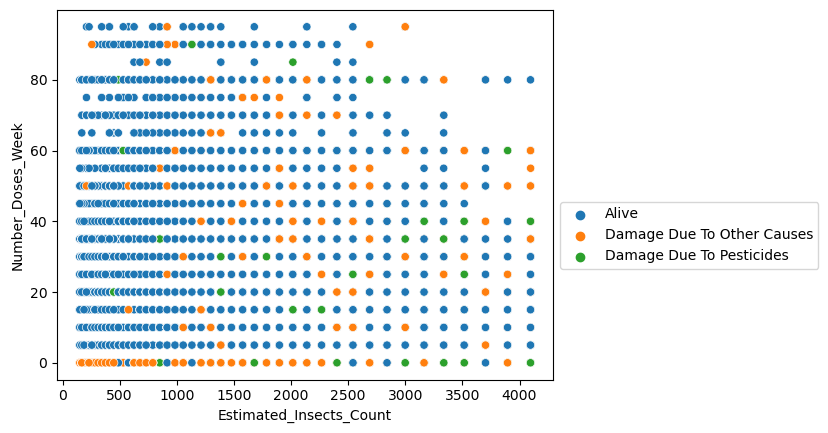

In [64]:
sns.scatterplot(data = eda_df, x = 'Estimated_Insects_Count', y = 'Number_Doses_Week', hue="Crop_Damage")
plt.legend(bbox_to_anchor= (1,0.5))
plt.show()

In [65]:
eda_df = eda_df.reset_index()
# eda_df = eda_df.drop('Index', axis =1)

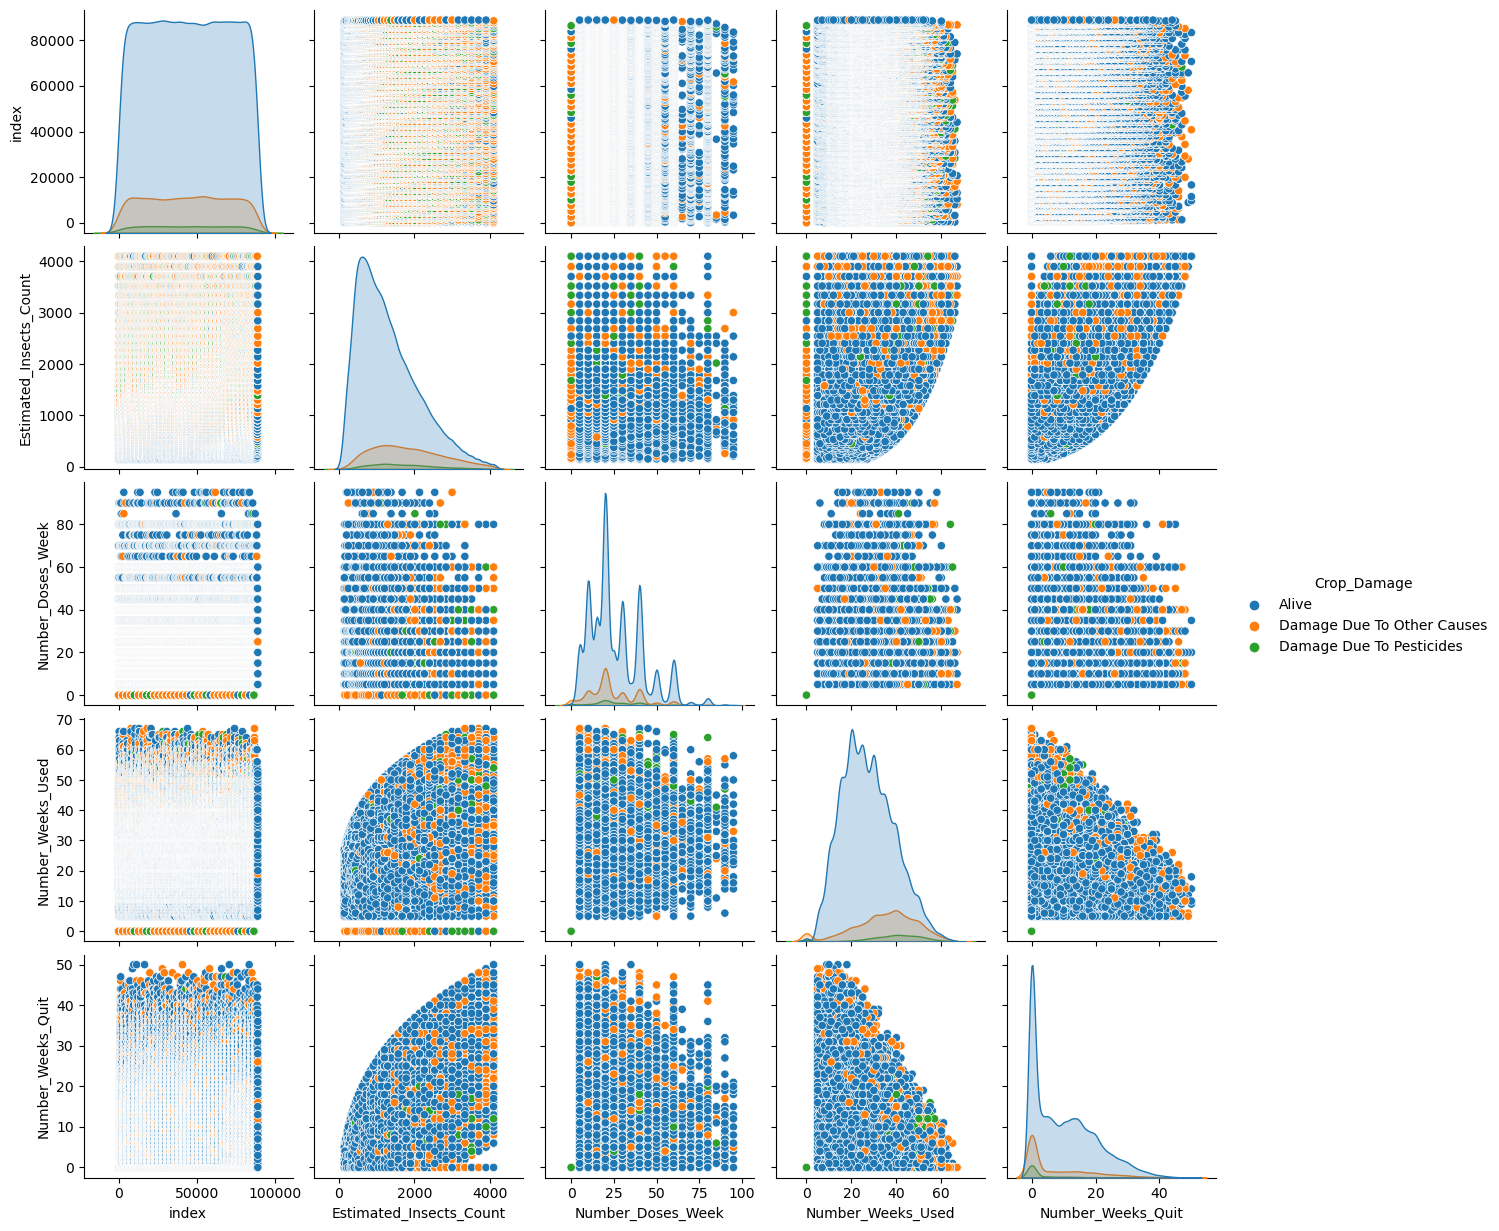

In [66]:
sns.pairplot(eda_df, hue ='Crop_Damage')
plt.show()

### Modeling

In [104]:
combined_df.head()

Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
0                      188          1          0                       1   
1                      209          1          0                       1   
2                      257          1          0                       1   
3                      257          1          1                       1   
4                      342          1          0                       1   

   Number_Doses_Week  Number_Weeks_Used  Number_Weeks_Quit  Season  \
0                  0                0.0                  0       1   
1                  0                0.0                  0       2   
2                  0                0.0                  0       2   
3                  0                0.0                  0       2   
4                  0                0.0                  0       2   

   Crop_Damage  
0          0.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0

In [105]:
combined_df = combined_df.drop('ID', axis =1)

KeyError: "['ID'] not found in axis"

In [106]:
combined_df.head()

Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
0                      188          1          0                       1   
1                      209          1          0                       1   
2                      257          1          0                       1   
3                      257          1          1                       1   
4                      342          1          0                       1   

   Number_Doses_Week  Number_Weeks_Used  Number_Weeks_Quit  Season  \
0                  0                0.0                  0       1   
1                  0                0.0                  0       2   
2                  0                0.0                  0       2   
3                  0                0.0                  0       2   
4                  0                0.0                  0       2   

   Crop_Damage  
0          0.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0

In [107]:
unnecessary_cols = ["ID","Crop_Type", "Season"]
final_df = eda_df.drop(unnecessary_cols, axis =1)

In [108]:
final_df.shape

(148168, 8)

In [109]:
final_df.head()

index  Estimated_Insects_Count    Soil_Type Pesticide_Use_Category  \
0      0                      188  Soil Type 0             Never Used   
1      1                      209  Soil Type 0             Never Used   
2      2                      257  Soil Type 0             Never Used   
3      3                      257  Soil Type 1             Never Used   
4      4                      342  Soil Type 0             Never Used   

   Number_Doses_Week  Number_Weeks_Used  Number_Weeks_Quit  \
0                  0                0.0                  0   
1                  0                0.0                  0   
2                  0                0.0                  0   
3                  0                0.0                  0   
4                  0                0.0                  0   

                  Crop_Damage  
0                       Alive  
1  Damage Due To Other Causes  
2  Damage Due To Other Causes  
3  Damage Due To Other Causes  
4  Damage Due To Other Causes

#### fill in missing values using mean

In [110]:
final_df.isnull().sum()

index                          0
Estimated_Insects_Count        0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used          14893
Number_Weeks_Quit              0
Crop_Damage                59310
dtype: int64

In [111]:
mean_fill = final_df['Number_Weeks_Used'].mean()

In [112]:
final_df['Number_Weeks_Used'] = final_df['Number_Weeks_Used'].fillna(mean_fill)

In [113]:
final_df.isnull().sum()

index                          0
Estimated_Insects_Count        0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used              0
Number_Weeks_Quit              0
Crop_Damage                59310
dtype: int64

#### Encoding Soil Type as binary output

In [114]:
final_df.replace({ "Soil Type 0": 0,
                 "Soil Type 1": 1}, inplace = True)

In [115]:
final_df.head()

index  Estimated_Insects_Count  Soil_Type Pesticide_Use_Category  \
0      0                      188          0             Never Used   
1      1                      209          0             Never Used   
2      2                      257          0             Never Used   
3      3                      257          1             Never Used   
4      4                      342          0             Never Used   

   Number_Doses_Week  Number_Weeks_Used  Number_Weeks_Quit  \
0                  0                0.0                  0   
1                  0                0.0                  0   
2                  0                0.0                  0   
3                  0                0.0                  0   
4                  0                0.0                  0   

                  Crop_Damage  
0                       Alive  
1  Damage Due To Other Causes  
2  Damage Due To Other Causes  
3  Damage Due To Other Causes  
4  Damage Due To Other Causes

In [116]:
pesticide_use_df = pd.get_dummies(final_df['Pesticide_Use_Category'])

In [117]:
pesticide_use_df.head()

Currently Using  Never Used  Previously Used
0                0           1                0
1                0           1                0
2                0           1                0
3                0           1                0
4                0           1                0

In [118]:
final_df = pd.concat([final_df, pesticide_use_df], axis = 1)

In [119]:
final_df.shape

(148168, 11)

In [120]:
final_df.head()

index  Estimated_Insects_Count  Soil_Type Pesticide_Use_Category  \
0      0                      188          0             Never Used   
1      1                      209          0             Never Used   
2      2                      257          0             Never Used   
3      3                      257          1             Never Used   
4      4                      342          0             Never Used   

   Number_Doses_Week  Number_Weeks_Used  Number_Weeks_Quit  \
0                  0                0.0                  0   
1                  0                0.0                  0   
2                  0                0.0                  0   
3                  0                0.0                  0   
4                  0                0.0                  0   

                  Crop_Damage  Currently Using  Never Used  Previously Used  
0                       Alive                0           1                0  
1  Damage Due To Other Causes                0           1                0  
2  Damage Due To Other Causes                0           1                0  
3  Damage Due To Other Causes                0           1                0  
4  Damage Due To Other Causes                0           1                0

In [121]:
dummy_cols = ['Pesticide_Use_Category', 'Never Used']
final_df = final_df.drop(dummy_cols, axis =1)
print(final_df.shape)

(148168, 9)


#### Dataset splitting (train, val, test

In [122]:
train_df = final_df[~final_df['Crop_Damage'].isnull()]
test_df = final_df[final_df['Crop_Damage'].isnull()]
print("Shape of training dataset is {}".format(train_df.shape))
print("Shape of testing dataset is {}".format(test_df.shape))

Shape of training dataset is (88858, 9)
Shape of testing dataset is (59310, 9)


In [123]:
data = train_df.drop('Crop_Damage', axis =1)
labels = train_df['Crop_Damage']

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size = 0.2, random_state = 42)

In [126]:
x_test = test_df.drop('Crop_Damage', axis =1)

In [127]:
print("X_train Shape: {}".format(x_train.shape))
print("X_val Shape: {}".format(x_val.shape))
print("X_test Shape: {}".format(x_test.shape))

print("Y_train Shape: {}".format(y_train.shape))
print("Y_val Shape: {}".format(y_val.shape))


X_train Shape: (71086, 8)
X_val Shape: (17772, 8)
X_test Shape: (59310, 8)
Y_train Shape: (71086,)
Y_val Shape: (17772,)


In [128]:
final_df.shape

(148168, 9)

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
classifier = LogisticRegression()

In [131]:
classifier.fit(x_train, y_train)

LogisticRegression()

In [132]:
y_pred = classifier.predict(x_val)

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

In [134]:
confusion_matrix(y_val, y_pred)

array([[14557,   246,     0],
       [ 2333,   166,     0],
       [  432,    38,     0]], dtype=int64)

In [135]:
accuracy_score(y_val, y_pred)

0.8284379923475129

In [136]:
print(classification_report(y_val, y_pred))

                            precision    recall  f1-score   support

                     Alive       0.84      0.98      0.91     14803
Damage Due To Other Causes       0.37      0.07      0.11      2499
  Damage Due To Pesticides       0.00      0.00      0.00       470

                  accuracy                           0.83     17772
                 macro avg       0.40      0.35      0.34     17772
              weighted avg       0.75      0.83      0.77     17772

